##Webscraping des véhicules sur DakarVente

In [1]:
#Import required packages
import pandas as pd
from bs4 import BeautifulSoup as bs
from requests import get
import numpy as np

In [ ]:
# URL to scrap
url = {
    "vehicles" : "https://dakarvente.com/annonces-rubrique-vehicules-2.html",
    "motos" :"https://dakarvente.com/annonces-categorie-motos-3.html",
    "vehicles_leasing": "https://dakarvente.com/annonces-categorie-location-de-vehicules-8.html",
    "phones": "https://dakarvente.com/annonces-categorie-telephones-32.html"
}

In [ ]:
for key in url.keys():
  print(key)
  print(type(key))

vehicles
<class 'str'>
motos
<class 'str'>
vehicles_leasing
<class 'str'>
phones
<class 'str'>


In [ ]:
url['vehicles']

'https://dakarvente.com/annonces-rubrique-vehicules-2.html'

In [ ]:
# Retrieve HTML code
html_code = get(url['vehicles'])
# Create beautifoulsoup object
bs_object = bs(html_code.text, 'html.parser')
# Segmenter le code html selon les différents conteneurs
containers = bs_object.find_all('article')

In [ ]:
container = containers[0]
container

<article class="col-xs-6 col-sm-4 col-md-6 col-lg-4 item item-product-grid-3 post" id="div-desktop">
<div class="item-inner mv-effect-translate-1 mv-box-shadow-gray-1" style="height:300px; border-bottom:3px solid #c0c0c0;">
<div class="" style="background-color:#fff;">
<div style="width:100%; height:33px; background:#FFF; font-weight:bold; color:#FFF; text-align:center; font-size:15px; padding:5px;"></div>
<div style="height:150px; overflow:hidden;"><h2><a href="https://www.dakarvente.com/annonce-42400-cadillac-platinium.html" title="Cadillac Platinium"><img alt="Cadillac Platinium" src=" media/annonces/pics/thumbs/0057660ef784d9e491a1f82f3d3f84f2.jpeg "/></a><a href="https://www.dakarvente.com/annonce-42400-cadillac-platinium.html" title="Cadillac Platinium"></a></h2>
</div>
</div>
<div class="content-price"><span class="" style="color:#0a66c2; font-size:20px;">8 600 000 FCFA</span></div>
<div class="content-desc"><a class="mv-overflow-ellipsis" href="https://www.dakarvente.com/annonc

In [ ]:
title = container.find('a', class_='mv-overflow-ellipsis').text
title

'Cadillac Platinium'

In [ ]:
price = container.find('div',class_='content-price').span.text.replace(' ','').replace('FCFA','')
price

'8600000'

In [ ]:
adress = container.findAll('div', class_='content-price')[1].span.text
adress

'Biagui'

In [ ]:
image_link = container.find('img')['src']
image_link

' media/annonces/pics/thumbs/0057660ef784d9e491a1f82f3d3f84f2.jpeg '

In [2]:
# URLS to scrap
url = {
    "vehicles" : "https://dakarvente.com/index.php?page=annonces_rubrique&url_categorie_2=vehicules&id=2&sort=&nb={page}",
    "motos" :"https://dakarvente.com/index.php?page=annonces_categorie&id=3&sort=&nb={page}",
    "vehicles_leasing": "https://dakarvente.com/index.php?page=annonces_categorie&id=8&sort=&nb={page}",
    "phones": "https://dakarvente.com/index.php?page=annonces_categorie&id=32&sort=&nb={page}"
}

In [3]:
df = pd.DataFrame()
for key in url.keys():
  if key == "vehicles":
    n = 111
  elif key == "motos":
    n = 12
  elif key == "vehicles_leasing":
    n = 5
  elif key == "phones":
    n = 43
  for page in range(1,n):
    #url = f'https://dakarvente.com/index.php?page=annonces_rubrique&url_categorie_2=vehicules&id=2&sort=&nb={page}'
    url_s = url[key]
    url_s = url_s.replace("{page}",str(page))
    # Make the request and check the status code
    try:
      html_code = get(url_s, timeout=10)
    except:
      print(url_s, end=" ")
      print(html_code.status_code)
      print(f"Error fetching data for {key} on page {page}")
      continue
    # if html_code.status_code != 200:
    #   print(f"Error fetching data for {key} on page {page}")
    #   continue
    bs_object = bs(html_code.text, 'html.parser')
    containers = bs_object.find_all('article')
    data = []
    for container in containers:
      try:
        title = container.find('a', class_='mv-overflow-ellipsis').text
        price = container.find('div',class_='content-price').span.text.replace(' ','').replace('FCFA','')
        adress = container.findAll('div', class_='content-price')[1].span.text
        image_link = container.find('img')['src']

        dict = {
            'title' : title,
            'price' : int(price),
            'adress': adress,
            'image_link': image_link,
            'page'  : page,
            'category' : key
        }
        #print(dict)
        data.append(dict)
      except:
        pass

    df_part = pd.DataFrame(data)
    df = pd.concat([df,df_part],axis=0).reset_index(drop=True)

https://dakarvente.com/index.php?page=annonces_rubrique&url_categorie_2=vehicules&id=2&sort=&nb=59 200
Error fetching data for vehicles on page 59
https://dakarvente.com/index.php?page=annonces_rubrique&url_categorie_2=vehicules&id=2&sort=&nb=109 200
Error fetching data for vehicles on page 109
https://dakarvente.com/index.php?page=annonces_categorie&id=3&sort=&nb=3 200
Error fetching data for motos on page 3
https://dakarvente.com/index.php?page=annonces_categorie&id=32&sort=&nb=37 200
Error fetching data for phones on page 37
https://dakarvente.com/index.php?page=annonces_categorie&id=32&sort=&nb=38 200
Error fetching data for phones on page 38


In [4]:
pages = np.unique(df['page'])
pages

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 110])

In [6]:
categories = np.unique(df['category'])
categories

array(['motos', 'phones', 'vehicles', 'vehicles_leasing'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485 entries, 0 to 6484
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       6485 non-null   object
 1   price       6485 non-null   int64 
 2   adress      6485 non-null   object
 3   image_link  6485 non-null   object
 4   page        6485 non-null   int64 
 5   category    6485 non-null   object
dtypes: int64(2), object(4)
memory usage: 304.1+ KB


In [8]:
df.head()

,title,price,adress,image_link,page,category
0,jeep Cherokee,8900000,Amitié,media/annonces/pics/thumbs/529cabd00f51603bbf...,1,vehicles
1,Toyota corolla 2010,3200000,Grand Yoff,media/annonces/pics/thumbs/b7cd34f44d989bf97b...,1,vehicles
2,Hyundai elantara,7500000,Amitié,media/annonces/pics/thumbs/8c7612d7b8cbaacfd6...,1,vehicles
3,Hyundai sonata 2013,3350000,Dakar,media/annonces/pics/thumbs/79a5a594950da44fd0...,1,vehicles
4,Citroën DS4,6700000,Ouakam,media/annonces/pics/thumbs/4728323fde10cfba19...,1,vehicles


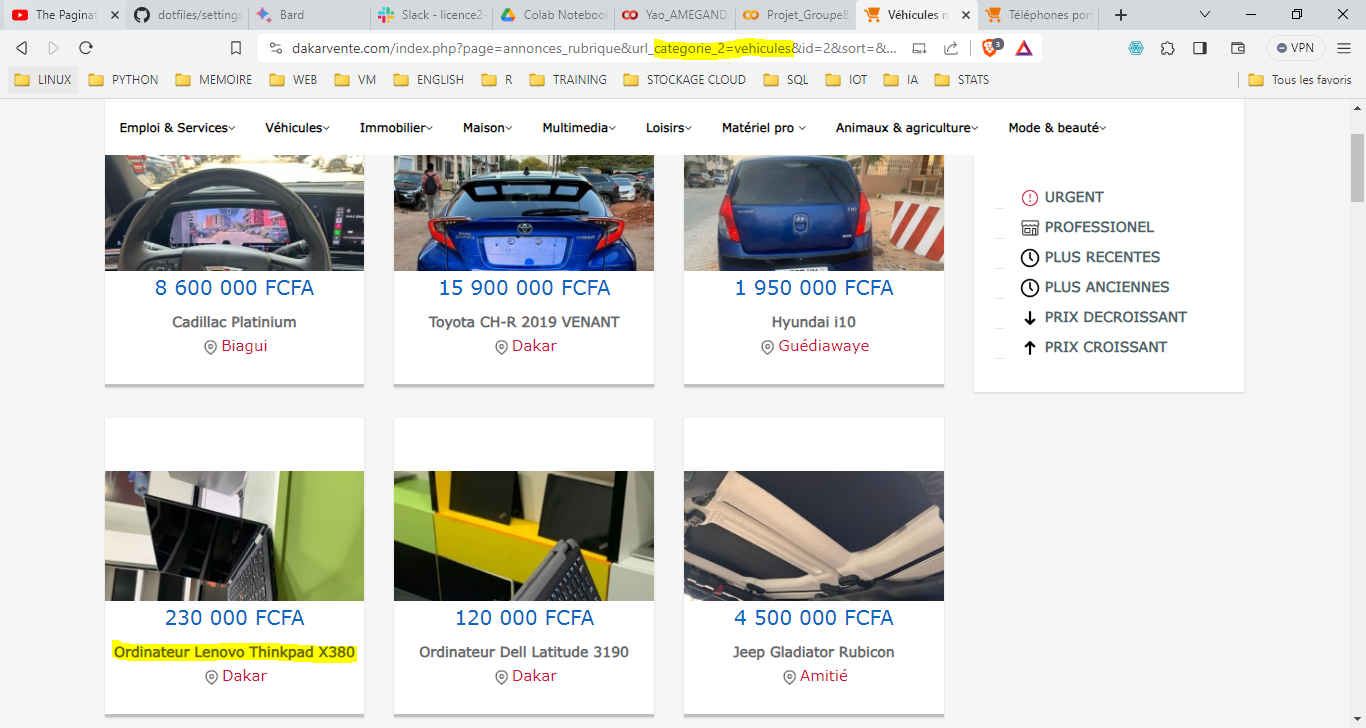

In [ ]:
df.tail()

,title,price,adress,image_link,page
158,Peugeot 3008 VENANT 2018,17200000,Dakar,media/annonces/pics/thumbs/6362f5de5f9ae8dabb...,4
159,Toyota C-HR Hybrid 2019,16450000,Dakar,media/annonces/pics/thumbs/0d5c1174ed34328fbf...,4
160,Hyandai Santa Fe 2017 sous douane,7000000,Sicap Foire,media/annonces/pics/thumbs/86f315e078f3ab2b6e...,4
161,Kia sportage 2017,13500000,Dakar,media/annonces/pics/thumbs/1ba264403af387bfaf...,4
162,Ranger Rover Evoque 2014,10500000,Dakar,media/annonces/pics/thumbs/d3159f22d897dc1678...,4


In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

title         0
price         0
adress        0
image_link    0
page          0
category      0
dtype: int64

In [11]:
df['title']

0                            jeep Cherokee 
1                       Toyota corolla 2010
2                          Hyundai elantara
3                       Hyundai sonata 2013
4                               Citroën DS4
                       ...                 
6480                              Iphone 5s
6481     Samsung galaxy grand prime plus 4g
6482                             Ipad air 1
6483             Vends un Tecno camon x pro
6484                        Iphone 6 simple
Name: title, Length: 6485, dtype: object

In [12]:
#export dataframe to file
df.to_csv('dakarvente.csv', header = True, index = False)